### Use the Trained Model for Forecasting

####  Load Required Libraries

In [3]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib  # For loading the saved model
from sklearn.metrics import mean_absolute_error, mean_squared_error

####  Define Forecasting Period

In [2]:
# Define the forecast horizon (6-12 months)
forecast_steps = 252  # Approx. 1 year of trading days

#### load the pre-trained model

In [7]:
import os

model_path = "xgboost_trained_model.json"

if os.path.exists(model_path):
    print("Model file found ✅")
else:
    print("Model file NOT found ❌")

Model file found ✅


### load the pre-trained model

In [25]:
import os
print(os.getcwd())

/Users/zelalemtegene/Documents/week-11/notebooks


In [27]:
os.chdir('/Users/zelalemtegene/Documents/week-11/notebooks/data')  # Replace with the actual path
data = pd.read_csv('merged_data.csv', parse_dates=['Date'], index_col='Date')

In [29]:
os.chdir('/Users/zelalemtegene/Documents/week-11/') # Load the pre-trained XGBoost model 
model = xgb.Booster()
model.load_model('xgboost_trained_model.json')

### Generate the Forecast



/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_93088/96301775.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_close = close_prices[-1]


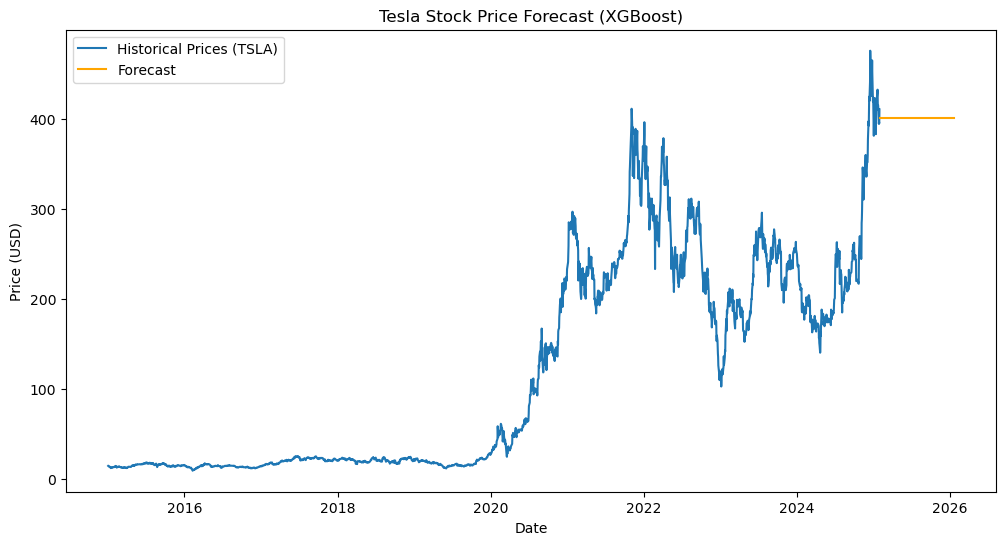

Forecast Volatility (Std Dev): $0.00
Historical Volatility (Std Dev): $84.48


In [37]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from datetime import timedelta

# Assuming data and model are already loaded
close_prices = data['nan_x.3']  # TSLA Close

# Forecast horizon
forecast_horizon = 252
future_dates = pd.date_range(start=close_prices.index[-1] + timedelta(days=1), periods=forecast_horizon, freq='B')

# Prepare the last known data with model-expected features
last_data = data.tail(1)[['nan_x', 'nan_x.1', 'nan_x.2', 'nan_y', 'nan_y.1', 'nan_y.2', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']]
last_data.columns = ['TSLA_Open', 'TSLA_High', 'TSLA_Low', 'BND_Close', 'BND_High', 'BND_Low', 'SPY_Close', 'SPY_High', 'SPY_Low']

# Convert to DMatrix
d_last = xgb.DMatrix(last_data)

# Forecast loop (predict TSLA Close, keep other features static)
forecast = []
current_close = close_prices[-1]

for _ in range(forecast_horizon):
    pred = model.predict(d_last)[0]
    forecast.append(pred)
    # Update TSLA_Close (assuming model predicts this); keep others static
    last_data['TSLA_Low'] = last_data['TSLA_Low'].values[0]  # Static
    last_data['TSLA_High'] = last_data['TSLA_High'].values[0]  # Static
    last_data['TSLA_Open'] = last_data['TSLA_Open'].values[0]  # Static
    d_last = xgb.DMatrix(last_data)

# Convert forecast to a Series
forecast_series = pd.Series(forecast, index=future_dates)

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Historical Prices (TSLA)')
plt.plot(forecast_series, label='Forecast', color='orange')
plt.title('Tesla Stock Price Forecast (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Volatility analysis
forecast_std = np.std(forecast)
historical_std = np.std(close_prices[-252:])
print(f"Forecast Volatility (Std Dev): ${forecast_std:.2f}")
print(f"Historical Volatility (Std Dev): ${historical_std:.2f}")

### Forecast Analysis & Forecast loop



/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_93088/2387561216.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_data['TSLA_Open'] = last_data['TSLA_Open'].values[0] * (pred / close_prices[-1])
/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_93088/2387561216.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_data['TSLA_High'] = last_data['TSLA_High'].values[0] * (pred / close_prices[-1])
/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_93088/2387561216.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

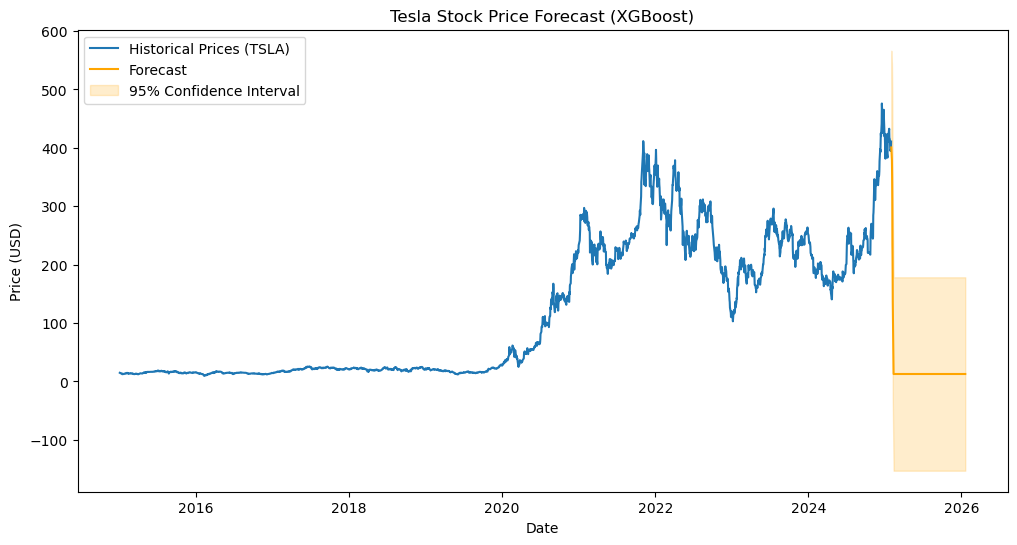

Forecast Start: $400.65
Forecast End: $12.81
Forecast Volatility (Std Dev): $46.33
Historical Volatility (Std Dev): $84.48


In [40]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from datetime import timedelta

# Assuming data and model are loaded
close_prices = data['nan_x.3']
forecast_horizon = 252
future_dates = pd.date_range(start=close_prices.index[-1] + timedelta(days=1), periods=forecast_horizon, freq='B')

# Prepare last data
last_data = data.tail(1)[['nan_x', 'nan_x.1', 'nan_x.2', 'nan_y', 'nan_y.1', 'nan_y.2', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']]
last_data.columns = ['TSLA_Open', 'TSLA_High', 'TSLA_Low', 'BND_Close', 'BND_High', 'BND_Low', 'SPY_Close', 'SPY_High', 'SPY_Low']
d_last = xgb.DMatrix(last_data)

# Historical averages for BND and SPY
bnd_close_avg = data['nan_y'][-252:].mean()
bnd_high_avg = data['nan_y.1'][-252:].mean()
bnd_low_avg = data['nan_y.2'][-252:].mean()
spy_close_avg = data['Unnamed: 11'][-252:].mean()
spy_high_avg = data['Unnamed: 12'][-252:].mean()
spy_low_avg = data['Unnamed: 13'][-252:].mean()

# Forecast loop
forecast = []
for i in range(forecast_horizon):
    pred = model.predict(d_last)[0]
    forecast.append(pred)
    last_data['TSLA_Open'] = last_data['TSLA_Open'].values[0] * (pred / close_prices[-1])
    last_data['TSLA_High'] = last_data['TSLA_High'].values[0] * (pred / close_prices[-1])
    last_data['TSLA_Low'] = last_data['TSLA_Low'].values[0] * (pred / close_prices[-1])
    last_data['BND_Close'] = bnd_close_avg
    last_data['BND_High'] = bnd_high_avg
    last_data['BND_Low'] = bnd_low_avg
    last_data['SPY_Close'] = spy_close_avg
    last_data['SPY_High'] = spy_high_avg
    last_data['SPY_Low'] = spy_low_avg
    d_last = xgb.DMatrix(last_data)

forecast_series = pd.Series(forecast, index=future_dates)

# Confidence intervals
historical_std = np.std(close_prices[-252:])
confidence_factor = 1.96
lower_bound = forecast_series - (confidence_factor * historical_std)
upper_bound = forecast_series + (confidence_factor * historical_std)

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Historical Prices (TSLA)')
plt.plot(forecast_series, label='Forecast', color='orange')
plt.fill_between(future_dates, lower_bound, upper_bound, color='orange', alpha=0.2, label='95% Confidence Interval')
plt.title('Tesla Stock Price Forecast (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Volatility stats
forecast_std = np.std(forecast)
print(f"Forecast Start: ${forecast_series.iloc[0]:.2f}")
print(f"Forecast End: ${forecast_series.iloc[-1]:.2f}")
print(f"Forecast Volatility (Std Dev): ${forecast_std:.2f}")
print(f"Historical Volatility (Std Dev): ${historical_std:.2f}")